In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the embeddings

In [2]:
embedding = np.load("../files/embedding.npy", mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

## Read the words

In [3]:
words = []
with open("../files/words.txt","r") as f:
    for line in f:
        word = line[2:-3]
        words.append(word)

## Create a datafrmae of words (as rows) and embeddings (as columns)

In [4]:
df = pd.DataFrame(data=embedding,index = words)
df.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
,-2.506652,-0.660315,3.513652,2.064573,1.016609,2.508891,-1.443799,-5.096051,1.292137,1.006947,...,-2.600289,2.294587,-0.211167,-0.904042,-3.773165,-2.465733,-2.615954,-0.592713,2.083887,0.587571
cell,-2.929329,-0.753183,3.446260,1.379164,2.485236,2.724488,-2.007528,-6.968168,1.343989,0.057638,...,-4.971962,3.170025,0.036403,-0.772250,-3.033934,-2.677931,-1.574416,0.719655,3.798445,1.526275
patient,-3.009927,-1.134339,4.749529,0.662009,2.397317,2.838428,-2.314898,-6.130804,0.585679,0.243070,...,-2.897183,3.135238,0.245946,-2.120335,-1.841553,-2.586954,-2.635705,1.164525,4.257591,0.717725
meshd009369,-2.679750,-1.177165,3.586595,2.403354,2.074462,2.940534,-2.092840,-6.245307,0.678010,0.505695,...,-5.091603,3.780937,0.313964,-2.557980,-2.331291,-2.706614,-1.122745,0.115335,3.934741,0.530273
survey,-2.788071,-1.805163,1.204242,2.901088,1.724542,2.571950,-0.919250,-6.229417,1.000043,0.423170,...,-4.554814,2.469184,0.490396,-1.423632,-3.272070,-2.532732,-1.509117,0.588215,3.166957,1.333367
two,-2.725630,-0.786608,3.612751,2.151632,2.782182,2.908757,-1.504236,-8.157762,1.314024,-0.061304,...,-4.443257,2.919484,-0.253954,-1.285098,-2.468191,-2.599241,-2.572081,0.518966,2.587375,0.936494
0,-2.958906,-2.017266,2.407492,2.940838,2.344495,2.345530,-1.451335,-6.069992,0.475322,0.757776,...,-3.985995,1.761402,0.243853,-1.256533,-1.712480,-2.469434,-1.631213,0.806690,3.653390,0.308258
show,-2.903615,-1.190125,2.005589,2.191583,1.754801,2.542356,-1.320267,-6.161342,0.948302,0.570182,...,-3.342243,2.566463,0.302649,-1.461814,-2.259100,-2.451454,-1.296911,0.573064,3.249578,1.317088
one,-2.742930,-0.578864,3.739990,2.530746,1.783139,2.298330,-2.341918,-5.627186,0.996143,0.833495,...,-3.685719,3.030709,-0.203374,-2.157854,-2.361258,-2.072890,-2.324438,-0.141359,1.964930,0.731141
expression,-2.669516,-1.774640,4.124116,1.059886,1.479066,2.826363,-1.376443,-6.655370,1.079862,0.160878,...,-4.791975,2.526657,-0.150542,-1.389300,-1.521259,-2.433518,-1.773730,0.663724,3.104211,0.424085


In [6]:
df.shape

(259807, 100)

## Reducing dimension by PCA

In [7]:
import sklearn
from sklearn.preprocessing import StandardScaler
cols = df.columns
features = cols[0:]
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'],index=words)

In [9]:
principalDf.head(n=10)

,principal component 1,principal component 2
,21.875154,-1.077652
cell,22.424828,-1.241331
patient,22.349081,-0.954017
meshd009369,21.572563,-0.528108
survey,22.011415,0.418837
two,22.776423,-1.367743
0,21.513288,0.974210
show,22.044598,-0.198148
one,21.845057,0.188584
expression,21.788395,-1.197278


## Create a new column "meshd" consisting of 0 and 1. It is 1 if the row index starts with "meshd", otherwise it is 0.

In [10]:
meshd= []
for i in principalDf.index:
    
    if(i.startswith('meshd')):
        meshd.append(1)
    else:    
        meshd.append(0)
            

In [11]:
principal_with_mesh_Df = principalDf.copy()
principal_with_mesh_Df["meshd"]=meshd

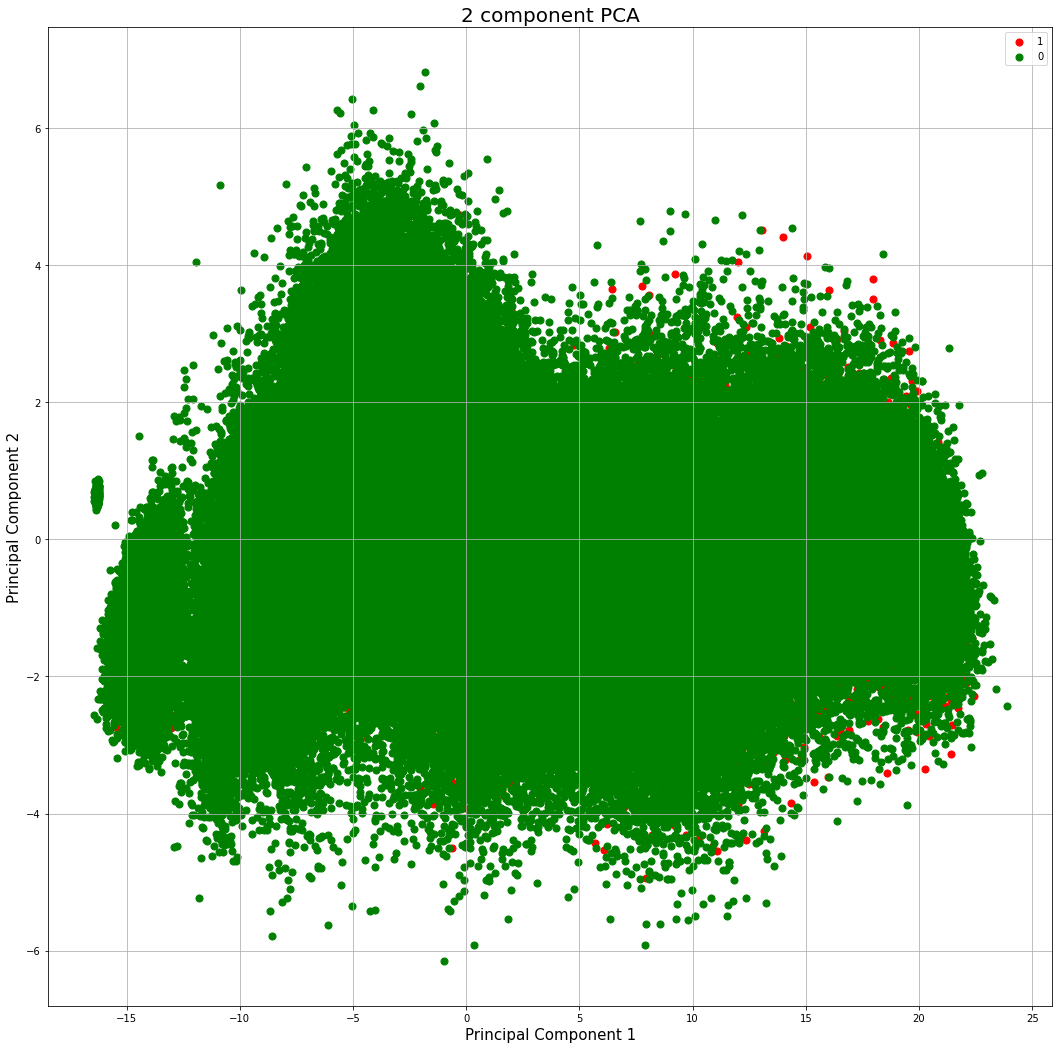

In [12]:
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r','g']
for target, color in zip(targets,colors):
    indicesToKeep = principal_with_mesh_Df['meshd'] == target
    ax.scatter(principal_with_mesh_Df.loc[indicesToKeep, 'principal component 1']
               , principal_with_mesh_Df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
## Considering a small 

In [13]:
small_carcinoma = principalDf.loc[["meshd000077216","meshd000077274","meshd000077277","meshd000230",
                               "meshd000231","meshd002277","meshd002278","meshd002279","meshd002280",
                              "meshd002280","meshd002281","meshd002282","meshd002283","meshd002284",
                               "meshd002285","meshd002286","meshd002287","meshd002288","meshd002289"]]
small_carcinoma

,principal component 1,principal component 2
meshd000077216,20.285246,-1.154553
meshd000077274,20.846170,-1.607588
meshd000077277,20.363863,-0.717424
meshd000230,21.399309,-3.133373
meshd000231,16.628107,-0.965922
meshd002277,21.489653,0.312982
meshd002278,19.905594,-0.155541
meshd002279,12.878372,0.038852
meshd002280,20.573362,-1.213057
meshd002280,20.573362,-1.213057


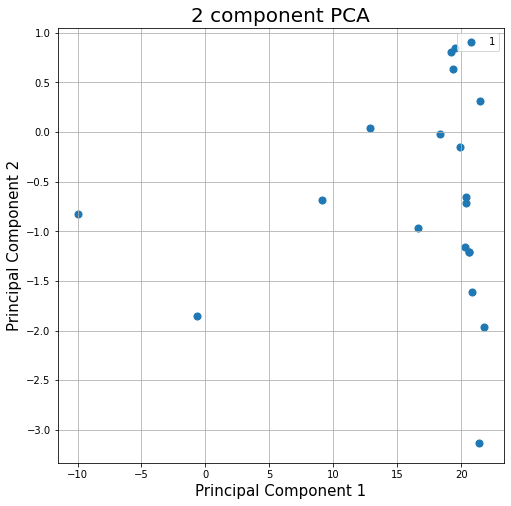

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(small_carcinoma.loc[:, 'principal component 1']
               , small_carcinoma.loc[:, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
melanoma = principalDf.loc[["meshd008545","meshd008546","meshd018326","meshd018328"]]
melanoma

,principal component 1,principal component 2
meshd008545,21.571400,-1.051470
meshd008546,9.874998,-1.366043
meshd018326,-7.998376,0.252660
meshd018328,17.628803,-0.936027


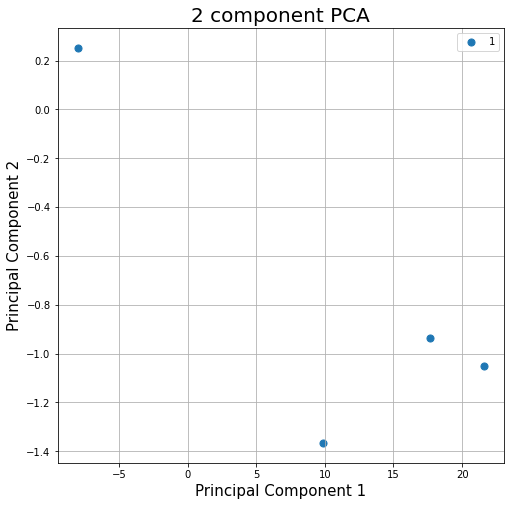

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(melanoma.loc[:, 'principal component 1']
               , melanoma.loc[:, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [17]:
leukemia= principalDf.loc[["meshd007938","meshd007939","meshd007941","meshd007942","meshd007943","meshd007945",
                           "meshd007946","meshd007947","meshd007948","meshd007951","meshd007952","meshd015448",
                          "meshd015451","meshd015452","meshd015456","meshd015458","meshd015459","meshd015461",
                          "meshd015463","meshd015464","meshd015466","meshd015470","meshd015471","meshd015473",
                          "meshd015477","meshd015479","meshd016582","meshd054066","meshd054218","meshd054403",
                          "meshd054429","meshd054438","meshd004915"]]



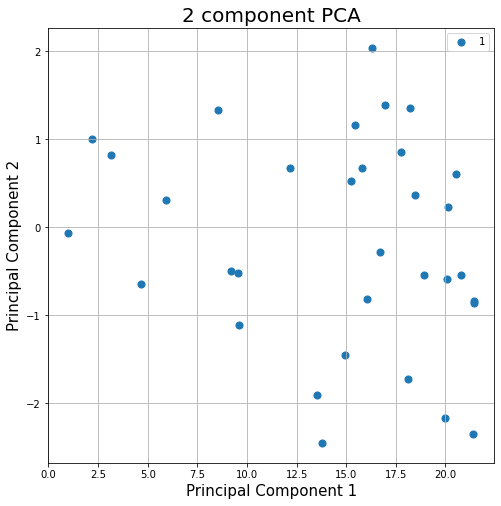

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(leukemia.loc[:, 'principal component 1']
               , leukemia.loc[:, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

PCA of mesh ID:

In [ ]:
meshDF = principalDf[principalDf.index.str.startswith('mesh')]
meshDF.head()

In [ ]:
mesh = []
for i in meshDF.index:
    
    if(i.startswith('meshd')):
        mesh.append(1)
    elif(i.startswith('meshc')):
        mesh.append(2)
    else:    
        mesh.append(0)
        print(i)

In [ ]:
meshDF_with_mesh_column = meshDF.copy()
meshDF_with_mesh_column["mesh"]=mesh

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0,2]
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = meshDF_with_mesh_column['mesh'] == target
    ax.scatter(meshDF_with_mesh_column.loc[indicesToKeep, 'principal component 1']
               , meshDF_with_mesh_column.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
embedding1 = principalDf.loc["cell"]
embedding1

In [ ]:
embedding2 = principalDf.loc["survey"]
embedding2

In [ ]:
np.abs(embedding1 - embedding2)